THEME BASED PROJECT - Stock Market Analysis

Apoorva 1602-17-737-008
Junaid 1602-17-737-020
Smaran 1602-17-737-035

Data Visualization code

Here we are importing the libraries. 


In [22]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from IPython.display import clear_output


# Data Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Here we are reading the output file(daily frequency) of Mapreduce into dataframe df

In [23]:
df = pd.read_csv('.\\MapReduce\\Test2\\daily\\output\\Daily\\part-r-00000', sep='\t')
df.head()

,stock_name,date,close
0,A,2010-01-04,31.300001
1,A,2010-01-05,30.960001
2,A,2010-01-06,30.850001
3,A,2010-01-07,30.809999
4,A,2010-01-08,30.800000


Here we are grouping the data that belongs to a perticular company and printing the names and count of all the stocks

In [24]:
grouped = df.groupby(df.stock_name)
names = df['stock_name'].unique().tolist()
for item in names:
    print(item)


A
AAL
AAP
AAPL
ABBV
ABC
ABT
ACN
ADBE
ADI
ADM
ADP
ADS
ADSK
AEE
AEP
AES
AET
AFL
AGN
AIG
AIV
AIZ
AJG
AKAM
ALB
ALK
ALL
ALLE
ALXN
AMAT
AME
AMG
AMGN
AMP
AMT
AMZN
AN
ANTM
AON
APA
APC
APD
APH
ARNC
ATVI
AVB
AVGO
AVY
AWK
AXP
AYI
AZO
BA
BAC
BAX
BBBY
BBT
BBY
BCR
BDX
BEN
BHI
BIIB
BK
BLK
BLL
BMY
BSX
BWA
BXP
C
CA
CAG
CAH
CAT
CB
CBG
CBS
CCI
CCL
CELG
CERN
CF
CFG
CHD
CHK
CHRW
CHTR
CI
CINF
CL
CLX
CMA
CMCSA
CME
CMG
CMI
CMS
CNC
CNP
COF
COG
COH
COL
COO
COP
COST
COTY
CPB
CRM
CSCO
CSRA
CSX
CTAS
CTL
CTSH
CTXS
CVS
CVX
CXO
D
DAL
DD
DE
DFS
DG
DGX
DHI
DHR
DIS
DISCA
DISCK
DLPH
DLR
DLTR
DNB
DOV
DOW
DPS
DRI
DTE
DUK
DVA
DVN
EA
EBAY
ECL
ED
EFX
EIX
EL
EMN
EMR
ENDP
EOG
EQIX
EQR
EQT
ES
ESRX
ESS
ETFC
ETN
ETR
EVHC
EW
EXC
EXPD
EXPE
EXR
F
FAST
FB
FBHS
FCX
FDX
FE
FFIV
FIS
FISV
FITB
FL
FLIR
FLR
FLS
FMC
FOX
FOXA
FRT
FSLR
FTI
FTR
FTV
GD
GE
GGP
GILD
GIS
GLW
GM
GOOG
GOOGL
GPC
GPN
GPS
GRMN
GS
GT
GWW
HAL
HAR
HAS
HBAN
HBI
HCA
HCN
HCP
HD
HES
HIG
HOG
HOLX
HON
HP
HPE
HPQ
HRB
HRL
HRS
HSIC
HST
HSY
HUM
IBM
ICE
IDXX
IFF
ILMN
INTC
INTU
IP
IPG

In [25]:
len(names)

501

In [26]:
#for exploring different stocks(give 1st letter and we'll show you list of stocks starting with that letter)
check=input("Enter the letter: ") 
res = [idx for idx in names if idx[0] == check.upper()]
print(res)

Enter the letter: a
['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET', 'AFL', 'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL', 'ALLE', 'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN', 'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO']


In [27]:
#Enter the Stock symbol and we will do furthur analysis
flag = 0

while flag == 0:
    stock_code = input("Enter stock code: ").upper().strip()
    #print(stock_code)
    #print(type(stock_code))
    if stock_code not in names:
        clear_output(wait=True)
        print('invalid code\n See and Re-enter!!')
    if stock_code in names:
        flag = 1
print(stock_code)

Enter stock code: AMzn
AMZN


In [28]:
globals()['stck'] = grouped.get_group(stock_code)
    
globals()['stck'] = globals()['stck'].set_index(globals()['stck']['date'], drop=False)

globals()['stck'] = globals()['stck'].drop(['stock_name','date'], axis=1)

Here we will split the big data set into multiple datasets with company's name as dataset's name

In [29]:
for item in names:
    globals()[item] = grouped.get_group(item)
    
for item in names:
    globals()[item] = globals()[item].set_index(globals()[item]['date'], drop=False)
    
for item in names:
    globals()[item] = globals()[item].drop(['stock_name','date'], axis=1)

In [30]:

stck.head()

,close
date,
2010-01-04,133.899994
2010-01-05,134.690002
2010-01-06,132.250000
2010-01-07,130.000000
2010-01-08,133.520004


1)Here we'll plot graph to observe the fluctuations of Entered stock 

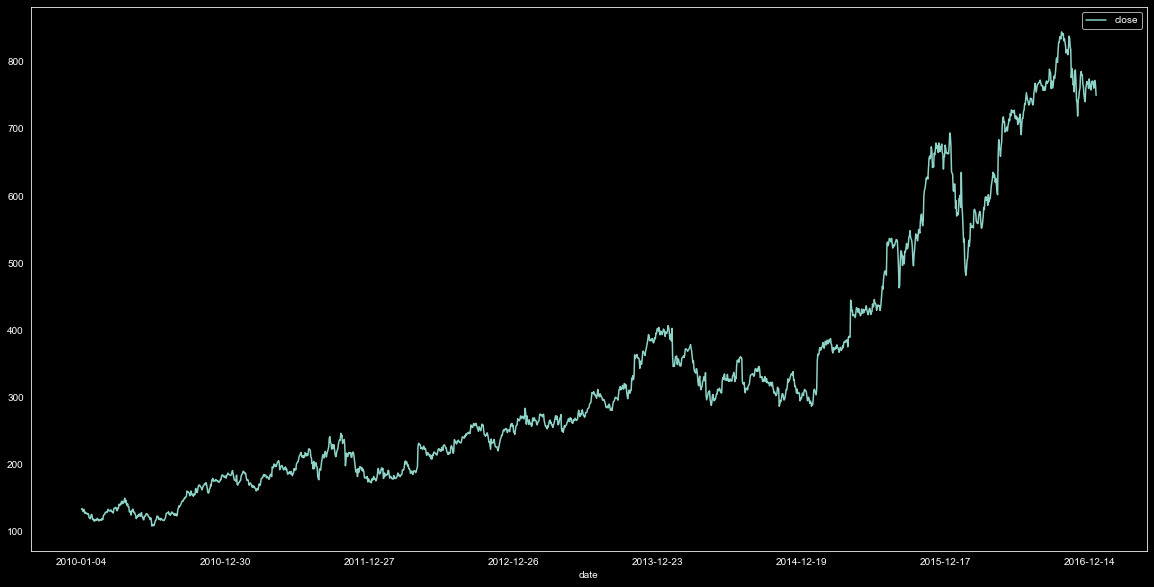

In [31]:
mpl.rc('figure', figsize=(20, 10))
mpl.__version__

# Adjusting the style of matplotlib
plt.style.use('dark_background')


stck.plot(grid = False)

2)Calculating Moving average with a window of 100 days and plotting graph to measure given stock's support and resistance

In [32]:
stck['movin_avg'] = stck.rolling(window=100).mean()
stck.tail()

,close,movin_avg
date,,
2016-12-23,760.590027,781.911500
2016-12-27,771.400024,782.017800
2016-12-28,772.130005,782.079301
2016-12-29,765.150024,782.065201
2016-12-30,749.869995,781.880801


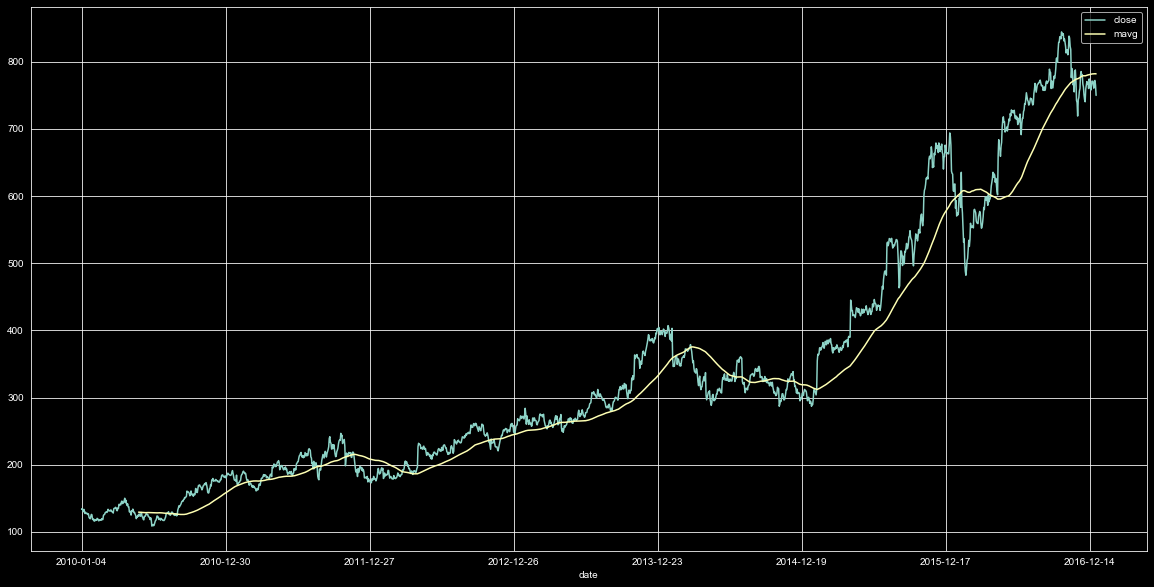

In [33]:
stck['close'].plot()
stck['movin_avg'].plot(label='mavg')
plt.legend()

3)Here we will try to check the stability of company by viewing returns, which can be calculated using 'percentage change' on adjusted close price

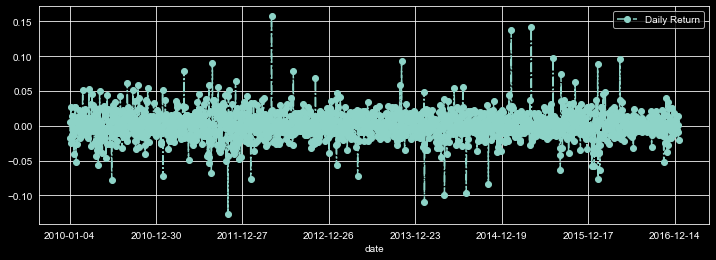

In [34]:
stck['Daily Return'] = stck['close'].pct_change()

stck['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='-.', marker='o')

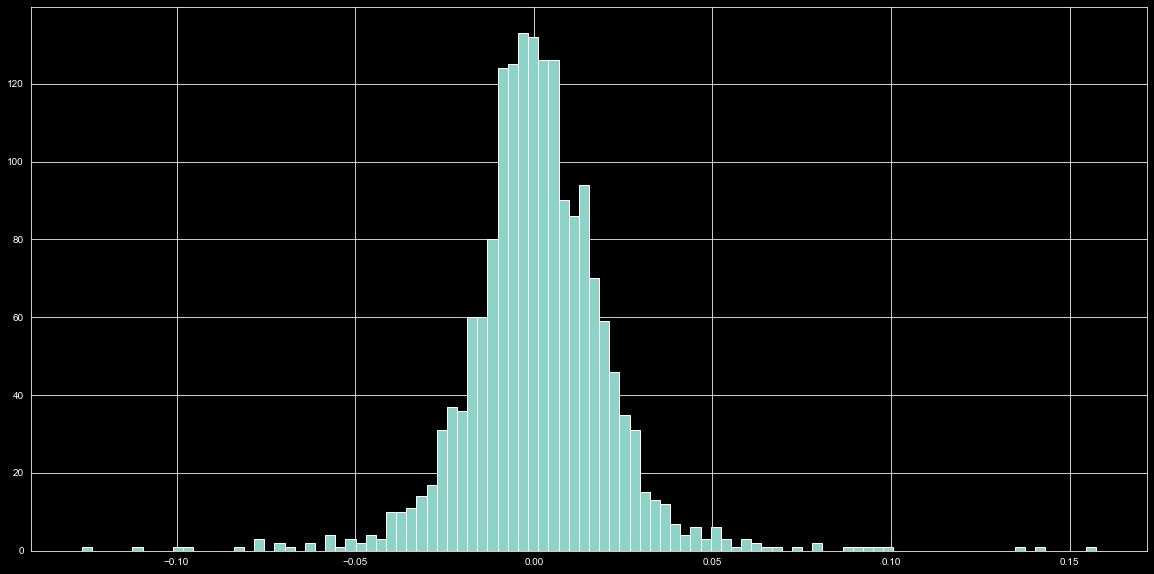

In [35]:
stck['Daily Return'].hist(bins=100)

4) we will try to compare stocks of notable tech gaints and analyse there relative changes using secondary_y option in plots 

In [36]:
#You can do this analysis taking any no.of companies you want
stocks = pd.DataFrame({"AAPL": AAPL["close"],
                     "MSFT": MSFT["close"],
                      "ORCL": ORCL["close"],
                      "AMZN": AMZN["close"],
                      "GOOGL": GOOGL["close"],
                      "IBM": IBM["close"],})
 
stocks.head()

,AAPL,MSFT,ORCL,AMZN,GOOGL,IBM
date,,,,,,
2010-01-04,214.009998,30.950001,24.850000,133.899994,626.750011,132.449997
2010-01-05,214.379993,30.959999,24.820000,134.690002,623.990017,130.850006
2010-01-06,210.969995,30.770000,24.459999,132.250000,608.260035,130.000000
2010-01-07,210.580000,30.450001,24.379999,130.000000,594.100015,129.550003
2010-01-08,211.980005,30.660000,24.680000,133.520004,602.020005,130.850006


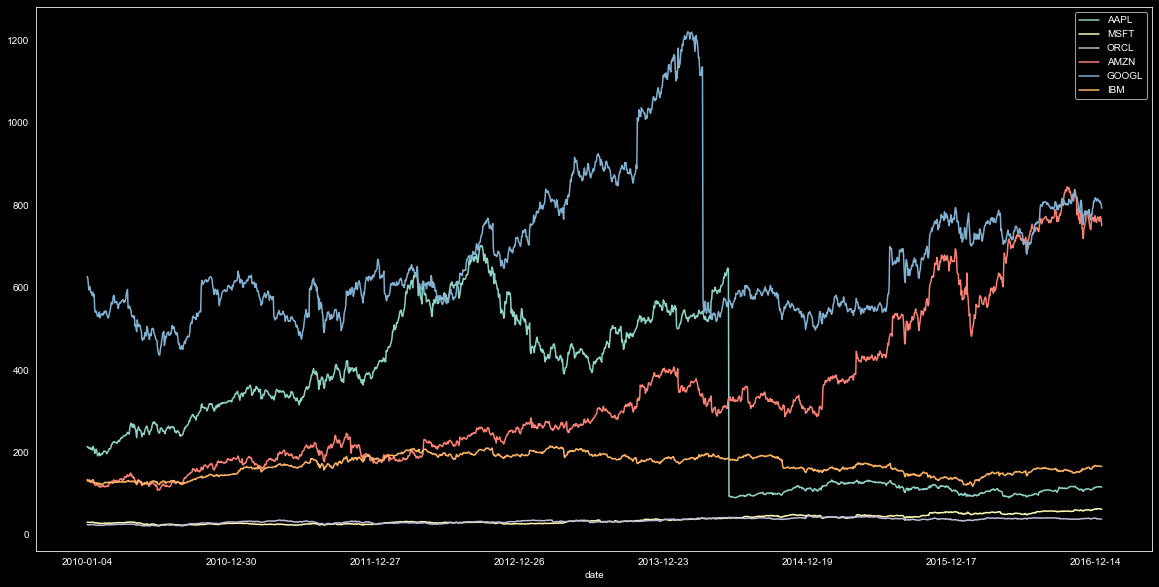

In [37]:
stocks.plot(legend=True, grid=False)

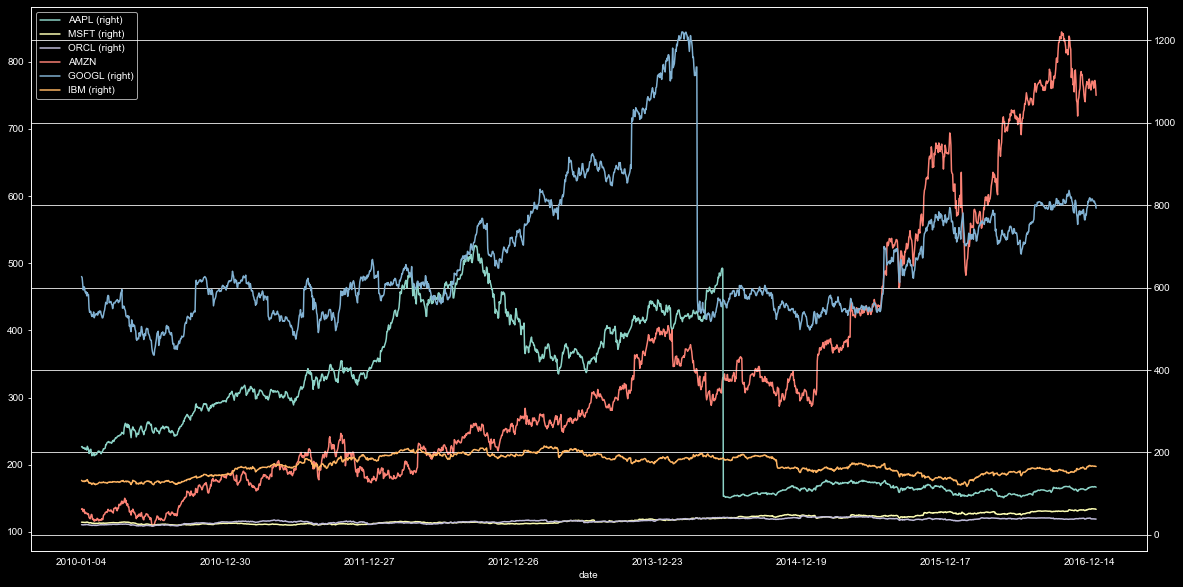

In [38]:
stocks.plot(secondary_y = ["AAPL", "MSFT","ORCL","GOOGL","IBM"], grid = False,figsize=(20,10))

comparing the daily returns of these companies using jointplot of seaborn

In [39]:
tech_returns = stocks.pct_change()
tech_returns.head()

,AAPL,MSFT,ORCL,AMZN,GOOGL,IBM
date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.000323,-0.001207,0.005900,-0.004404,-0.012080
2010-01-06,-0.015906,-0.006137,-0.014504,-0.018116,-0.025209,-0.006496
2010-01-07,-0.001849,-0.010400,-0.003271,-0.017013,-0.023280,-0.003462
2010-01-08,0.006648,0.006897,0.012305,0.027077,0.013331,0.010035


C:\Users\Innu\anaconda3\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


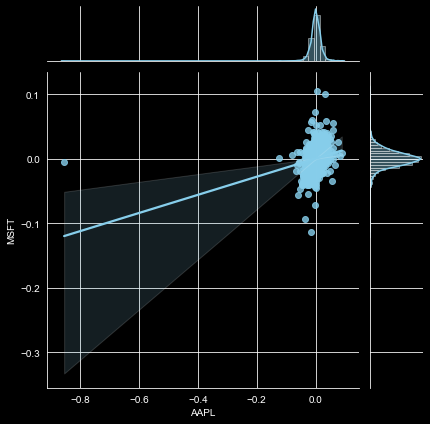

In [40]:
sns.jointplot('AAPL','MSFT',tech_returns, kind='reg', size=6, color='skyblue')

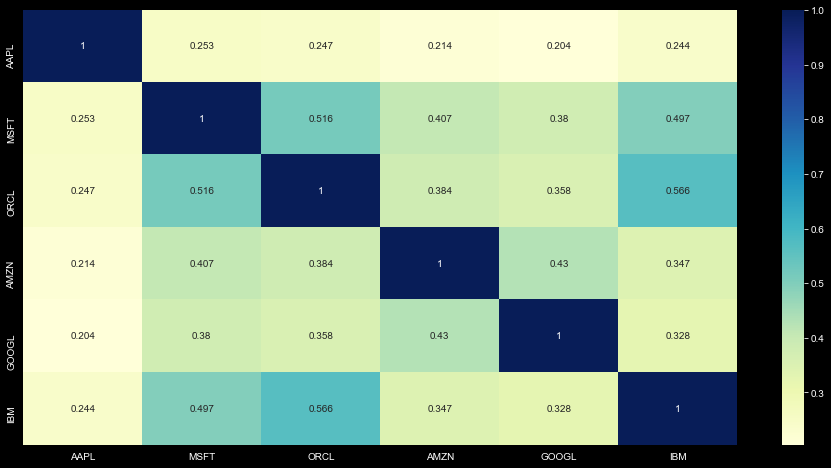

In [41]:
plt.figure(figsize=(16,8))
ax = sns.heatmap(tech_returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

5) Finally we will do the risk analysis of these companies and plot a graph of 'Risk vs Returns'

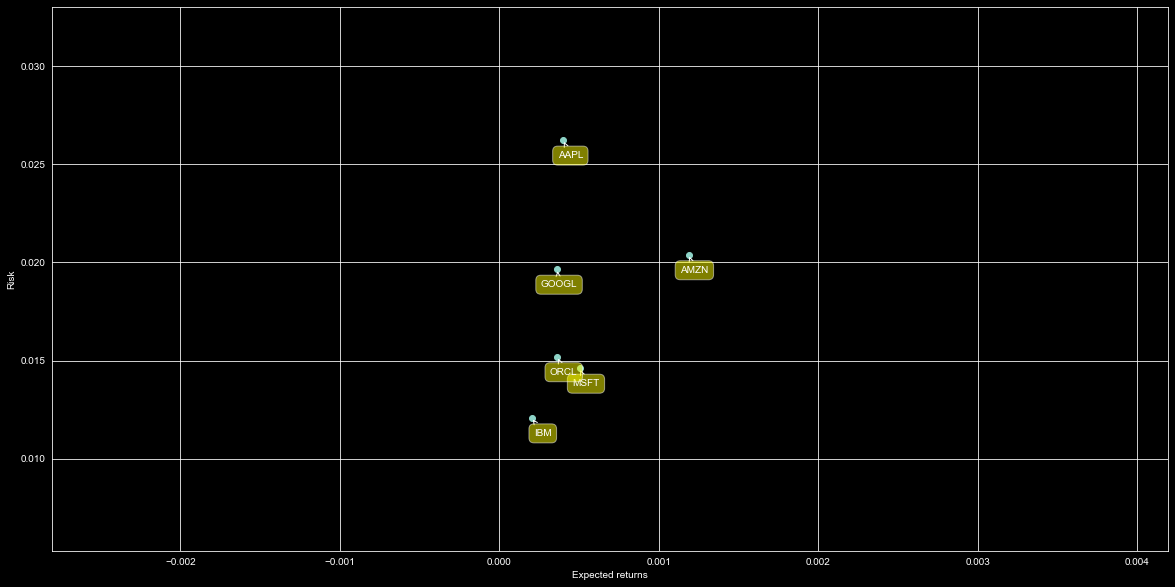

In [42]:
plt.scatter(tech_returns.mean(), tech_returns.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(tech_returns.columns, tech_returns.mean(), tech_returns.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

Low risk, high returns are the best options to invest.
You can do similar analysis for any company you want.
THANKYOU